---
### <center> Carga de Datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import kendalltau
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Carga y visualización parcial de Datos sobre la Demanda de energía eléctrica de los últimos años:
df_dem = pd.read_csv('datasets/demanda-ltimos-aos.csv')
df_dem.head(3)

,id,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,fecha_proceso,lote_id_log,indice_tiempo
0,699232,2017,1,AARGTAOY,AEROP ARG 2000 - Aeroparque,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1990.439,2020-05-05 11:06:49.000713,67,2017-01
1,699233,2017,1,ABRILHCY,ABRIL CLUB DE CAMPO,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1609.464,2020-05-05 11:06:49.000713,67,2017-01
2,699234,2017,1,ACARQQ3Y,ASOC.COOP.ARG. - Quequén,GU,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,421.334,2020-05-05 11:06:49.000713,67,2017-01


In [3]:
# Carga y visualización parcial de Datos sobre la Generación de energía eléctrica de los últimos años:
df_gen = pd.read_csv('datasets/generacin-ltimos-aos.csv')
df_gen.head(3)

,id,anio,mes,maquina,central,agente,agente_descripcion,region,pais,tipo_maquina,fuente_generacion,tecnologia,categoria_hidraulica,categoria_region,generacion_neta_MWh,fecha_proceso,lote_id_log,indice_tiempo
0,481607,2017,1,3ARRDI01,3ARR,QUIL3A3A,QUILMES - PLANTA TRES ARROYOS,BUENOS AIRES,Argentina,MOTOR DIESEL,Térmica,DI,NaN,Gba - Litoral - Buenos Aires,0.000,2020-05-05 11:06:29.851206,67,2017-01
1,481608,2017,1,ABRODI01,ABRO,CTBROWNG,C.T. ALMIRANTE BROWN,GRAN BS.AS.,Argentina,MOTOR DIESEL,Térmica,DI,NaN,Gba - Litoral - Buenos Aires,109.454,2020-05-05 11:06:29.851206,67,2017-01
2,481609,2017,1,ACAJTG01,CAPE,CAPEX-QA,CAPEX S.A. AUTOGENERADOR,COMAHUE,Argentina,TURBO GAS,Térmica,CC,NaN,Comahue,26787.822,2020-05-05 11:06:29.851206,67,2017-01


---
### <center> Preparación de Datos

In [4]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40388 entries, 0 to 40387
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  40388 non-null  int64  
 1   anio                40388 non-null  int64  
 2   mes                 40388 non-null  int64  
 3   agente_nemo         40388 non-null  object 
 4   agente_descripcion  40388 non-null  object 
 5   tipo_agente         40388 non-null  object 
 6   region              40388 non-null  object 
 7   provincia           40388 non-null  object 
 8   categoria_area      40388 non-null  object 
 9   categoria_demanda   40388 non-null  object 
 10  tarifa              40388 non-null  object 
 11  categoria_tarifa    40388 non-null  object 
 12  demanda_MWh         40388 non-null  float64
 13  fecha_proceso       40388 non-null  object 
 14  lote_id_log         40388 non-null  int64  
 15  indice_tiempo       40388 non-null  object 
dtypes: f

In [5]:
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22444 entries, 0 to 22443
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    22444 non-null  int64  
 1   anio                  22444 non-null  int64  
 2   mes                   22444 non-null  int64  
 3   maquina               22444 non-null  object 
 4   central               22444 non-null  object 
 5   agente                22444 non-null  object 
 6   agente_descripcion    22444 non-null  object 
 7   region                22444 non-null  object 
 8   pais                  22444 non-null  object 
 9   tipo_maquina          22444 non-null  object 
 10  fuente_generacion     22444 non-null  object 
 11  tecnologia            22444 non-null  object 
 12  categoria_hidraulica  2202 non-null   object 
 13  categoria_region      22444 non-null  object 
 14  generacion_neta_MWh   22444 non-null  float64
 15  fecha_proceso      

In [6]:
# Chequeo de registros duplicados:
df_dem.duplicated().value_counts()

False    40388
Name: count, dtype: int64

In [7]:
# Chequeo de registros duplicados:
df_gen.duplicated().value_counts()

False    22444
Name: count, dtype: int64

In [8]:
# Verificar los valores nulos:
valores_nulos = df_dem.isnull()

# Contar los valores nulos en cada columna
conteo_nulos = valores_nulos.sum()
conteo_nulos

id                    0
anio                  0
mes                   0
agente_nemo           0
agente_descripcion    0
tipo_agente           0
region                0
provincia             0
categoria_area        0
categoria_demanda     0
tarifa                0
categoria_tarifa      0
demanda_MWh           0
fecha_proceso         0
lote_id_log           0
indice_tiempo         0
dtype: int64

In [9]:
# Verificar los valores nulos:
valores_nulos = df_gen.isnull()

# Contar los valores nulos en cada columna
conteo_nulos = valores_nulos.sum()
conteo_nulos


id                          0
anio                        0
mes                         0
maquina                     0
central                     0
agente                      0
agente_descripcion          0
region                      0
pais                        0
tipo_maquina                0
fuente_generacion           0
tecnologia                  0
categoria_hidraulica    20242
categoria_region            0
generacion_neta_MWh         0
fecha_proceso               0
lote_id_log                 0
indice_tiempo               0
dtype: int64

In [10]:
df_gen['pais'].unique()

array(['Argentina'], dtype=object)

---
### <center> Análisis exploratorio de Datos

In [11]:
# Chequeo de registros con demandas negativos
condicion_negativos = df_dem['demanda_MWh'] < 0
filas_negativas = df_dem[condicion_negativos]
filas_negativas

,id,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,fecha_proceso,lote_id_log,indice_tiempo
34,699266,2017,1,APELPALD,APELP,DI,COMAHUE,LA PAMPA,Resto,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-0.001,2020-05-05 11:06:49.000713,67,2017-01
94,699325,2017,1,C16OCTUW,COOP. 16 DE OCTUBRE,DI,PATAGONICA,CHUBUT,Resto,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-0.001,2020-05-05 11:06:49.000713,67,2017-01
103,699334,2017,1,C3AR3A3W,COOP. CELTA - TRES ARROYOS,DI,BUENOS AIRES,BUENOS AIRES,Resto,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-0.001,2020-05-05 11:06:49.000713,67,2017-01
115,699346,2017,1,CALFAVQW,CALF NEUQUEN DISTRIBUIDOR,DI,COMAHUE,NEUQUEN,Resto,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-0.001,2020-05-05 11:06:49.000713,67,2017-01
151,699382,2017,1,CBARKE3W,COOPERATIVA DE BARKER,DI,BUENOS AIRES,BUENOS AIRES,Resto,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-0.001,2020-05-05 11:06:49.000713,67,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,739227,2020,2,EDERSARD,EMP DE ENERGIA DE RIO NEGRO SA,DI,COMAHUE,RIO NEGRO,Resto,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-0.001,2020-05-05 11:06:49.000713,67,2020-02
40011,739243,2020,2,EDESASAD,EMP.DIST.ENERGIA DE SALTA,DI,NOROESTE,SALTA,Resto,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-0.001,2020-05-05 11:06:49.000713,67,2020-02
40066,739298,2020,2,EPESAFSD,EPESF DISTRIBUIDOR,DI,LITORAL,SANTA FE,Santa Fe,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-0.001,2020-05-05 11:06:49.000713,67,2020-02
40233,739465,2020,2,SECHEPHD,SECHEEP,DI,NORESTE,CHACO,Resto,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-0.001,2020-05-05 11:06:49.000713,67,2020-02


In [12]:
# No seleccionar las filas negativas. Condición para seleccionar no incluir los negativos 
condicion = (df_dem['demanda_MWh'] >= 0) 

# Reiniciar el índice de la serie booleana
#condicion = condicion.reset_index(drop=True)

df_dem = df_dem.loc[condicion]
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39624 entries, 0 to 40387
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  39624 non-null  int64  
 1   anio                39624 non-null  int64  
 2   mes                 39624 non-null  int64  
 3   agente_nemo         39624 non-null  object 
 4   agente_descripcion  39624 non-null  object 
 5   tipo_agente         39624 non-null  object 
 6   region              39624 non-null  object 
 7   provincia           39624 non-null  object 
 8   categoria_area      39624 non-null  object 
 9   categoria_demanda   39624 non-null  object 
 10  tarifa              39624 non-null  object 
 11  categoria_tarifa    39624 non-null  object 
 12  demanda_MWh         39624 non-null  float64
 13  fecha_proceso       39624 non-null  object 
 14  lote_id_log         39624 non-null  int64  
 15  indice_tiempo       39624 non-null  object 
dtypes: float6

In [13]:
# Chequeo de registros negativos con generación negativa
condicion_negativos = df_gen['generacion_neta_MWh'] < 0
filas_negativas = df_gen[condicion_negativos]
filas_negativas
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22444 entries, 0 to 22443
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    22444 non-null  int64  
 1   anio                  22444 non-null  int64  
 2   mes                   22444 non-null  int64  
 3   maquina               22444 non-null  object 
 4   central               22444 non-null  object 
 5   agente                22444 non-null  object 
 6   agente_descripcion    22444 non-null  object 
 7   region                22444 non-null  object 
 8   pais                  22444 non-null  object 
 9   tipo_maquina          22444 non-null  object 
 10  fuente_generacion     22444 non-null  object 
 11  tecnologia            22444 non-null  object 
 12  categoria_hidraulica  2202 non-null   object 
 13  categoria_region      22444 non-null  object 
 14  generacion_neta_MWh   22444 non-null  float64
 15  fecha_proceso      

In [14]:
# Chequeo de provincias presentes:
df_dem['provincia'].value_counts()

provincia
BUENOS AIRES      21648
CHUBUT             2087
SANTA FE           2035
MENDOZA            1884
ENTRE RIOS         1264
NEUQUEN            1189
RIO NEGRO           999
CORDOBA             951
SAN JUAN            888
SANTA CRUZ          830
TUCUMAN             817
SAN LUIS            645
LA RIOJA            518
MISIONES            505
CORRIENTES          502
SALTA               467
SGO.DEL ESTERO      449
JUJUY               449
CATAMARCA           428
CHACO               391
LA PAMPA            350
FORMOSA             328
Name: count, dtype: int64

In [15]:
df_dem['region'].unique()

array(['GRAN BS.AS.', 'BUENOS AIRES', 'LITORAL', 'CUYO', 'PATAGONICA',
       'NORESTE', 'COMAHUE', 'NOROESTE', 'CENTRO'], dtype=object)

In [16]:
df_gen['region'].unique()

array(['BUENOS AIRES', 'GRAN BS.AS.', 'COMAHUE', 'CUYO', 'NORESTE',
       'PATAGONICA', 'NOROESTE', 'LITORAL', 'CENTRO', 'GENERAC MOVIL'],
      dtype=object)

In [17]:
# No seleccionamos la region = 'GENERAC MOVIL' de Generacion, ya que no se encuentra en las regiones de Demanda.
cond_gen = df_gen['region'] != 'GENERAC MOVIL'
df_gen = df_gen[cond_gen]
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19473 entries, 0 to 22443
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    19473 non-null  int64  
 1   anio                  19473 non-null  int64  
 2   mes                   19473 non-null  int64  
 3   maquina               19473 non-null  object 
 4   central               19473 non-null  object 
 5   agente                19473 non-null  object 
 6   agente_descripcion    19473 non-null  object 
 7   region                19473 non-null  object 
 8   pais                  19473 non-null  object 
 9   tipo_maquina          19473 non-null  object 
 10  fuente_generacion     19473 non-null  object 
 11  tecnologia            19473 non-null  object 
 12  categoria_hidraulica  2202 non-null   object 
 13  categoria_region      19473 non-null  object 
 14  generacion_neta_MWh   19473 non-null  float64
 15  fecha_proceso         19

In [18]:
df_dem['categoria_tarifa'].value_counts()

categoria_tarifa
Industrial/Comercial Grande    21144
Residencial                    15628
Comercial                       2850
Mercado a Término                  2
Name: count, dtype: int64

Al consultar las **'categoria_tarifa'**, observamos que existen varias clasificaciones para las tarifas (Residencial, Comercial, Industrial/Comercial Grande y  Mercado a término).

Observamos que el DataFrame Demanda tiene 39624 filas y el de Generación cuenta con 19473 filas, y que cada columna posee la misma cantidad de objetos no nulos (ni *'Nan'* ni *'None'*) a excepción de * demandas negativas * del Mercado a término, que tampoco los incluímos. Además, no existen registros duplicados. Tampoco cargaremos los períodos 1 y 2 del 2020, para poder comparar años completos.

In [19]:
df_gen['anio'].value_counts()

anio
2019    6791
2018    6302
2017    5260
2020    1120
Name: count, dtype: int64

In [20]:
df_dem['anio'].value_counts()

anio
2017    14467
2018    14078
2019     9559
2020     1520
Name: count, dtype: int64

In [21]:
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19473 entries, 0 to 22443
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    19473 non-null  int64  
 1   anio                  19473 non-null  int64  
 2   mes                   19473 non-null  int64  
 3   maquina               19473 non-null  object 
 4   central               19473 non-null  object 
 5   agente                19473 non-null  object 
 6   agente_descripcion    19473 non-null  object 
 7   region                19473 non-null  object 
 8   pais                  19473 non-null  object 
 9   tipo_maquina          19473 non-null  object 
 10  fuente_generacion     19473 non-null  object 
 11  tecnologia            19473 non-null  object 
 12  categoria_hidraulica  2202 non-null   object 
 13  categoria_region      19473 non-null  object 
 14  generacion_neta_MWh   19473 non-null  float64
 15  fecha_proceso         19

In [22]:
# Condición para seleccionar incluir sólo los años 2017, 2018, 2019.
condicion = df_dem['anio'].isin([2017, 2018, 2019]) 
df_dem = df_dem.loc[condicion]
df_dem['anio'].value_counts()

anio
2017    14467
2018    14078
2019     9559
Name: count, dtype: int64

In [23]:
# Condición para seleccionar incluir sólo los años 2017, 2018, 2019.
condicion = df_gen['anio'].isin([2017, 2018, 2019])
df_gen = df_gen.loc[condicion]
df_gen['anio'].value_counts()

anio
2019    6791
2018    6302
2017    5260
Name: count, dtype: int64

---
#### Preprocesamiento de datos para gráficos

In [24]:
# Generar dataframe Demanda con columnas de interés
df_dem = df_dem.iloc[:,[1,2,6,11,12]]
df_dem = df_dem.rename(columns={'anio': 'anio',
                         'mes': 'mes',
                      'region': 'region',
            'categoria_tarifa': 'categoria_tarifa',
                 'demanda_MWh': 'demanda_MWh'})
df_dem

,anio,mes,region,categoria_tarifa,demanda_MWh
0,2017,1,GRAN BS.AS.,Industrial/Comercial Grande,1990.439
1,2017,1,GRAN BS.AS.,Industrial/Comercial Grande,1609.464
2,2017,1,BUENOS AIRES,Industrial/Comercial Grande,421.334
3,2017,1,LITORAL,Industrial/Comercial Grande,449.145
4,2017,1,BUENOS AIRES,Industrial/Comercial Grande,18073.170
...,...,...,...,...,...
38826,2019,12,GRAN BS.AS.,Industrial/Comercial Grande,833.076
38827,2019,12,GRAN BS.AS.,Industrial/Comercial Grande,217.831
38828,2019,12,PATAGONICA,Industrial/Comercial Grande,248327.638
38829,2019,12,CUYO,Industrial/Comercial Grande,6073.625


In [25]:
# Generar dataframe Generacion con columnas de interés
df_gen = df_gen.iloc[:,[1,2,7,14]]
df_gen = df_gen.rename(columns={
                        'anio': 'anio',
                         'mes': 'mes',
                      'region':'region',
                 'generacion_neta_MWh': 'generacion_neta_MWh'})
df_gen

,anio,mes,region,generacion_neta_MWh
0,2017,1,BUENOS AIRES,0.000
1,2017,1,GRAN BS.AS.,109.454
2,2017,1,COMAHUE,26787.822
3,2017,1,COMAHUE,31017.278
4,2017,1,COMAHUE,31919.324
...,...,...,...,...
21319,2019,12,CENTRO,602.391
21320,2019,12,CENTRO,84.240
21321,2019,12,CENTRO,0.854
21322,2019,12,BUENOS AIRES,308.903


### Agrupamiento por Categoria de Tarifa

In [26]:
# Diccionario para almacenar los datos agrupados
data = {
    'tarifa': [],
    'cantidad': [],
    'energia': [],
    'total': 0  # Inicializar 'total' en 0
}
total_general = 0
# Agrupar el DataFrame por 'categoria_tarifa' y calcular la suma de 'demanda_MWh' para cada grupo
grupo_tarifas = df_dem.groupby('categoria_tarifa')

for tarifa, grupo in grupo_tarifas:
    cantidad_registros = len(grupo)
    demanda_energia = (grupo['demanda_MWh'].sum())/1000

    # Agregar los valores al diccionario
    data['tarifa'].append(tarifa)
    data['cantidad'].append(cantidad_registros)
    data['energia'].append(demanda_energia)
    data['total'] += demanda_energia  # Actualizar el 'total' general
    total_general += demanda_energia
    
# Agregar el total general al diccionario 'data'
tari_tot = 'TOTAL'
cant_tot = len(df_dem)
total_general = {
    'tarifa': tari_tot,
    'cantidad': cant_tot,
    'energia': total_general,
    'total': total_general  # El total general es igual a la energía total
}

# Agregar el total general al diccionario 'data'
data['tarifa'].append(total_general['tarifa'])
data['cantidad'].append(total_general['cantidad'])
data['energia'].append(total_general['energia'])
data['total'] = total_general['total']

data_agrupada_dem = pd.DataFrame(data)
data_agrupada_dem

,tarifa,cantidad,energia,total
0,Comercial,2700,113623.538603,394454.85564
1,Industrial/Comercial Grande,20055,112418.145232,394454.85564
2,Mercado a Término,2,0.001979,394454.85564
3,Residencial,15347,168413.169826,394454.85564
4,TOTAL,38104,394454.855640,394454.85564


#### Resumen de los datos estadísticos por Categoria de Tarifa
Cinco medidas descriptivas de los datos: el primer cuartil (Q1), la mediana (Q2), el tercer cuartil (Q3),
 el valor máximo, y el valor mínimo

In [27]:
data_agrupada_dem.describe()

,cantidad,energia,total
count,5.000000,5.000000,5.00000
mean,15241.600000,157781.942256,394454.85564
std,15292.207176,145799.580161,0.00000
min,2.000000,0.001979,394454.85564
25%,2700.000000,112418.145232,394454.85564
50%,15347.000000,113623.538603,394454.85564
75%,20055.000000,168413.169826,394454.85564
max,38104.000000,394454.855640,394454.85564


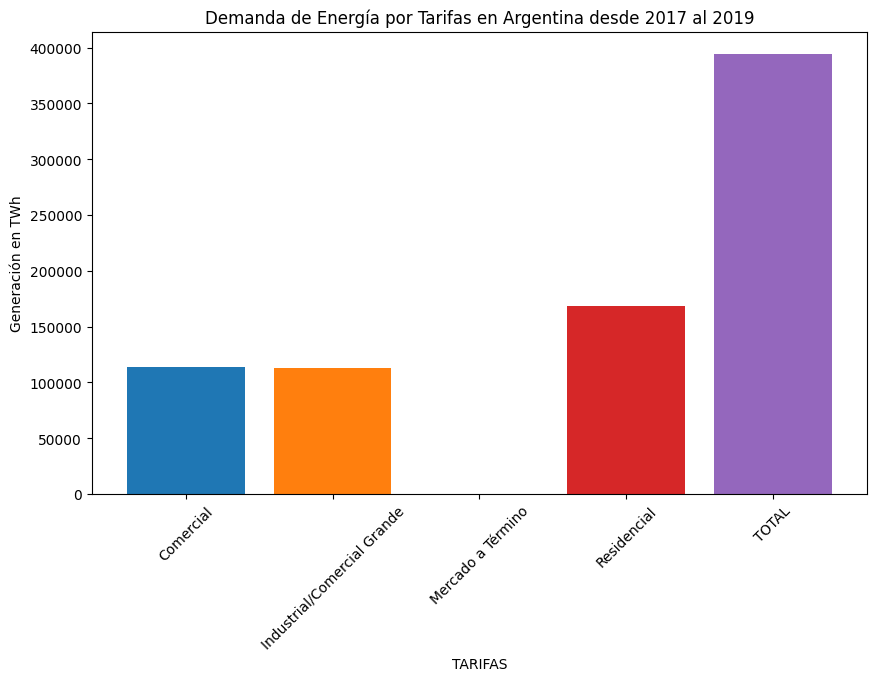

In [28]:
# Gráfico de Demanda por categoría de Tarifa
plt.figure(figsize=(10, 6))
palette = sns.color_palette() 
plt.bar(data_agrupada_dem['tarifa'], data_agrupada_dem['energia'], color = palette)

plt.title('Demanda de Energía por Tarifas en Argentina desde 2017 al 2019')
plt.xlabel('TARIFAS')
plt.ylabel('Generación en TWh')
plt.xticks(rotation=45)

plt.show()

### Agrupamiento por Región

In [29]:
# Diccionario para almacenar los datos agrupados
data = {
    'region': [],
    'cantidad': [],
    'energia': [],
    'total': 0  # Inicializar 'total' en 0
}
total_general = 0
# Agrupar el DataFrame por 'region' y calcular la suma de 'demanda_MWh' para cada grupo
grupo_regiones = df_dem.groupby('region')

for region, grupo in grupo_regiones:
    cantidad_registros = len(grupo)
    demanda_energia = (grupo['demanda_MWh'].sum())/1000

    # Agregar los valores al diccionario
    data['region'].append(region)
    data['cantidad'].append(cantidad_registros)
    data['energia'].append(demanda_energia)
    data['total'] += demanda_energia  # Actualizar el 'total' general
    total_general += demanda_energia
    
# Agregar el total general al diccionario 'data'
regi_tot = 'TOTAL'
cant_tot = len(df_dem)
total_general = {
    'region': regi_tot,
    'cantidad': cant_tot,
    'energia': total_general,
    'total': total_general  # El total general es igual a la energía total
}

# Agregar el total general al diccionario 'data'
data['region'].append(total_general['region'])
data['cantidad'].append(total_general['cantidad'])
data['energia'].append(total_general['energia'])
data['total'] = total_general['total']

data_agrupada_reg = pd.DataFrame(data)
data_agrupada_reg

,region,cantidad,energia,total
0,BUENOS AIRES,12917,45257.434398,394454.85564
1,CENTRO,1522,34271.228223,394454.85564
2,COMAHUE,2444,15143.121964,394454.85564
3,CUYO,2672,24473.463914,394454.85564
4,GRAN BS.AS.,7912,148891.048213,394454.85564
5,LITORAL,3161,48040.512095,394454.85564
6,NORESTE,1666,28403.569546,394454.85564
7,NOROESTE,3011,32846.811819,394454.85564
8,PATAGONICA,2799,17127.665468,394454.85564
9,TOTAL,38104,394454.855640,394454.85564


In [30]:
data_agrupada_reg.describe()

,cantidad,energia,total
count,10.000000,10.000000,1.000000e+01
mean,7620.800000,78890.971128,3.944549e+05
std,11282.704195,117408.718533,6.135626e-11
min,1522.000000,15143.121964,3.944549e+05
25%,2501.000000,25455.990322,3.944549e+05
50%,2905.000000,33559.020021,3.944549e+05
75%,6724.250000,47344.742671,3.944549e+05
max,38104.000000,394454.855640,3.944549e+05


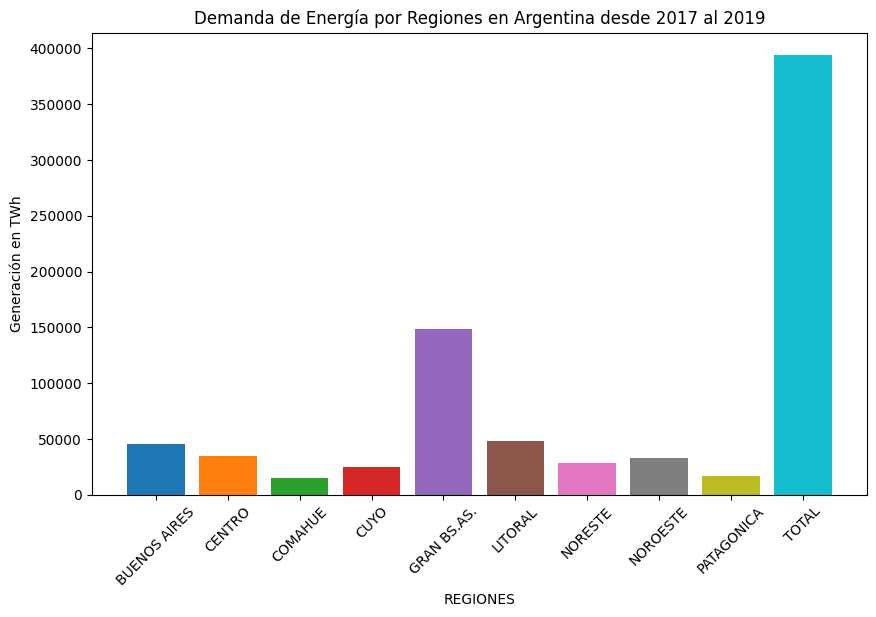

In [31]:
# Gráfico de Demanda por región
plt.figure(figsize=(10, 6))
palette = sns.color_palette() 
plt.bar(data_agrupada_reg['region'], data_agrupada_reg['energia'], color = palette)

plt.title('Demanda de Energía por Regiones en Argentina desde 2017 al 2019')
plt.xlabel('REGIONES')
plt.ylabel('Generación en TWh')
plt.xticks(rotation=45)

plt.show()

In [32]:
colores = ['red', 'green', 'orange']   # Colores para cada año
años = grupo_demandas['anio'].unique()

# Agrupa y acumula la demanda por mes y año
df_demanda_acumulada = (df_dem.groupby(['mes', 'anio'])['demanda_MWh'].sum()/1000).reset_index()

plt.figure(figsize=(12, 6))
#plt.style.use('Solarize_Light2')
palette = sns.color_palette()
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Itera sobre los meses y crea una caja de bigotes para cada añ
for mes in range(1, 13):
    demanda_por_mes = df_demanda_acumulada[df_demanda_acumulada['mes'] == mes]['demanda_MWh']
    
    # Crea el boxplot con el mes correspondiente en el eje x
    plt.boxplot(demanda_por_mes, positions=[mes], labels=[meses[mes - 1]], widths=0.6, showfliers=False,
                patch_artist=True, boxprops=dict(facecolor='blue'), medianprops=dict(color='black'))
# Configura el gráfico
plt.title('Evolución Mensual de la Demanda en Argentina (2017 - 2019)')
plt.xlabel('MESES')
plt.ylabel('Demanda (TWh)')
plt.grid(True)
plt.show()



NameError: name 'grupo_demandas' is not defined

In [ ]:
# Agrupa y acumula la generación por año y mes
df_generacion_acumulada = (df_gen.groupby(['anio', 'mes'])['generacion_neta_MWh'].sum()/1000).reset_index()
grupo_generacion = (df_gen.groupby(['anio', 'mes'])['generacion_neta_MWh'].sum()/1000).reset_index()
# Renombrar la columna de generación acumulada si lo deseas
#df_generacion_acumulada = df_generacion_acumulada.rename(columns={'generacion_neta_MWh': 'generacion_acumulada_MWh'})


In [ ]:
# Agrupa el DataFrame por 'anio', 'mes' y suma la demanda
grupo_generacion = (df_gen.groupby(['anio', 'mes'])['generacion_neta_MWh'].sum()/1000).reset_index()

In [ ]:
# Agrupa df_dem por año, mes, región y suma la demanda
generacion_agrupada = (df_gen.groupby(['anio', 'mes', 'region'])['generacion_neta_MWh'].sum()/1000).reset_index()
#demanda_agrupada = (df_dem.groupby(['anio', 'mes'])['demanda_MWh'].sum()/1000).reset_index()

In [ ]:
# Crea un nuevo DataFrame para almacenar la demanda acumulada
#df_demanda_acumulada = []

# Agrupa df_dem por año, mes, región y suma la demanda
demanda_agrupada = (df_dem.groupby(['anio', 'mes', 'region'])['demanda_MWh'].sum()/1000).reset_index()

# Inicializa la demanda acumulada por región
demanda_acumulada = {}
for region in demanda_agrupada['region'].unique():
    demanda_acumulada[region] = 0

# Crear una lista vacía para almacenar los datos
data = []

# Itera sobre el DataFrame original y acumula los datos
for indice, fila in demanda_agrupada.iterrows():
    demanda_acumulada[fila['region']] += fila['demanda_MWh']
    # Agrega los datos a la lista
    data.append({
        'anio': fila['anio'],
        'mes': fila['mes'],
        'region': fila['region'],
        'demanda_acumulada_MWh': demanda_acumulada[fila['region']]
    })

# Convierte la lista en un DataFrame y asigna el resultado nuevamente
df_demanda_acumulada = df_demanda_acumulada.append(data, ignore_index=True)

df_demanda_acumulada


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15076\1604540210.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_demanda_acumulada = df_demanda_acumulada.append(data, ignore_index=True)


,anio,mes,region,demanda_acumulada_MWh
0,2017,1,BUENOS AIRES,1.350718e+06
1,2017,1,CENTRO,1.073331e+06
2,2017,1,COMAHUE,4.873159e+05
3,2017,1,CUYO,8.663854e+05
4,2017,1,GRAN BS.AS.,4.604698e+06
...,...,...,...,...
643,2019,12,GRAN BS.AS.,1.488910e+05
644,2019,12,LITORAL,4.804051e+04
645,2019,12,NORESTE,2.840357e+04
646,2019,12,NOROESTE,3.284681e+04


In [ ]:
# Agrupa y acumula la demanda por año y mes
#df_demanda_acumulada = (df_dem.groupby(['anio'], ['mes'])['demanda_MWh'].sum()/1000).reset_index()

# Puedes renombrar la columna de demanda acumulada si lo deseas
#df_demanda_acumulada = df_demanda_acumulada.rename(columns={'df_demanda_acumulada': 'demanda_acumulada_MWh'})

# Ahora, df_demanda_acumulada contiene la demanda acumulada por año y mes

### Agrupamiento por Años

In [ ]:
grupo_demandas.describe()

,anio,mes,demanda_MWh
count,36.000000,36.00000,36.000000
mean,2018.000000,6.50000,10957.079323
std,0.828079,3.50102,817.386157
min,2017.000000,1.00000,9572.130666
25%,2017.000000,3.75000,10353.941772
50%,2018.000000,6.50000,10829.112998
75%,2019.000000,9.25000,11520.443038
max,2019.000000,12.00000,12607.552746


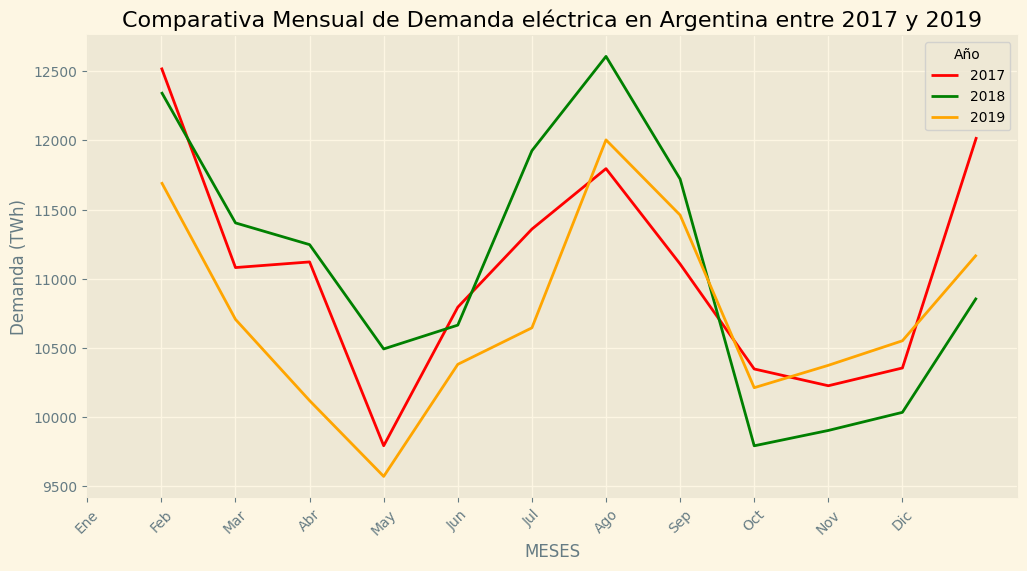

In [ ]:
# Grafico comparativo mensual de la Demanda eléctrica entre los años 2017 y 2019
plt.figure(figsize=(12, 6))

# Define los años y colores para cada año
años = grupo_demandas['anio'].unique()
colores = ['red', 'green', 'orange']  # Colores por año

# Itera sobre los años y crea una línea para cada uno
for i, año in enumerate(años):
    datos_año = grupo_demandas[grupo_demandas['anio'] == año]
    demanda_por_mes = datos_año.groupby('mes')['demanda_MWh'].sum()
    
    # Crea la línea con el color correspondiente
    plt.plot(demanda_por_mes.index, demanda_por_mes, label=str(año), color=colores[i])

# Configura el gráfico
plt.title('Comparativa Mensual de Demanda eléctrica en Argentina entre 2017 y 2019')
plt.xlabel('MESES')
plt.ylabel('Demanda (TWh)')

# Personaliza las etiquetas del eje x con los meses
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
plt.xticks(range(12), meses, rotation=45)

plt.legend(title='Año', loc='upper right')
plt.grid(True)
plt.show()

### Unión de dataset de Demanda y Generación para agrupar por Años

In [ ]:
df_demanda_acumulada

,mes,demanda_MWh,anio,region,demanda_acumulada_MWh
0,1,36575.626518,NaN,NaN,NaN
1,2,33192.619107,NaN,NaN,NaN
2,3,32489.531679,NaN,NaN,NaN
3,4,29859.203874,NaN,NaN,NaN
4,5,31842.737152,NaN,NaN,NaN
...,...,...,...,...,...
331,12,NaN,2019.0,GRAN BS.AS.,148891.048213
332,12,NaN,2019.0,LITORAL,48040.512095
333,12,NaN,2019.0,NORESTE,28403.569546
334,12,NaN,2019.0,NOROESTE,32846.811819


In [ ]:
df_combinado_2019

,mes,anio,demanda_MWh,generacion_acumulada_MWh
0,1,2019,11698.820426,11728.031005
1,2,2019,10706.955347,10971.101287
2,3,2019,10120.057956,10227.186963
3,4,2019,9572.130666,9741.266138
4,5,2019,10382.062182,10446.138304
5,6,2019,10645.883385,10847.949672
6,7,2019,12004.210209,12324.385750
7,8,2019,11460.983908,11583.889221
8,9,2019,10213.226701,10622.370953
9,10,2019,10374.901005,10593.105631


In [ ]:
# Acumulado de Demanda 2017
df_demanda_acumulada_2017 = df_demanda_acumulada.loc[df_demanda_acumulada['anio'] == 2017]

In [ ]:
# Acumulado de Demanda 2018
df_demanda_acumulada_2018 = df_demanda_acumulada.loc[df_demanda_acumulada['anio'] == 2018]

In [ ]:
# Acumulado de Demanda 2019
df_demanda_acumulada_2019 = df_demanda_acumulada.loc[df_demanda_acumulada['anio'] == 2019]

In [ ]:
# Acumulado de Generacion 2017
df_generacion_acumulada_2017 = df_generacion_acumulada[df_generacion_acumulada['anio'] == 2017]

In [ ]:
# Acumulado de Generacion 2018
df_generacion_acumulada_2018 = df_generacion_acumulada[df_generacion_acumulada['anio'] == 2018]

In [ ]:
# Acumulado de Generacion 2019
df_generacion_acumulada_2019 = df_generacion_acumulada[df_generacion_acumulada['anio'] == 2019]

In [ ]:
# Combina los DataFrames en uno SOLO - año 2017
df_combinado_2017 = df_demanda_acumulada_2017.merge(df_generacion_acumulada_2017, on=['anio', 'mes'])
df_combinado_2017

,mes,anio,demanda_MWh,generacion_acumulada_MWh
0,1,2017,12526.622750,12788.577644
1,2,2017,11081.460853,11379.570537
2,3,2017,11122.231576,11388.733806
3,4,2017,9793.758606,9986.148995
4,5,2017,10795.213435,10956.253342
5,6,2017,11359.330688,11762.974729
6,7,2017,11796.425782,12169.019305
7,8,2017,11107.250721,11462.231654
8,9,2017,10348.584573,10666.904748
9,10,2017,10227.329332,10580.278448


In [ ]:
# Combina los DataFrames en uno SOLO - año 2018
df_combinado_2018 = df_demanda_acumulada_2018.merge(df_generacion_acumulada_2018, on=['anio', 'mes'])

In [ ]:
# Combina los DataFrames en uno SOLO - año 2019
df_combinado_2019 = df_demanda_acumulada_2019.merge(df_generacion_acumulada_2019, on=['anio', 'mes'])

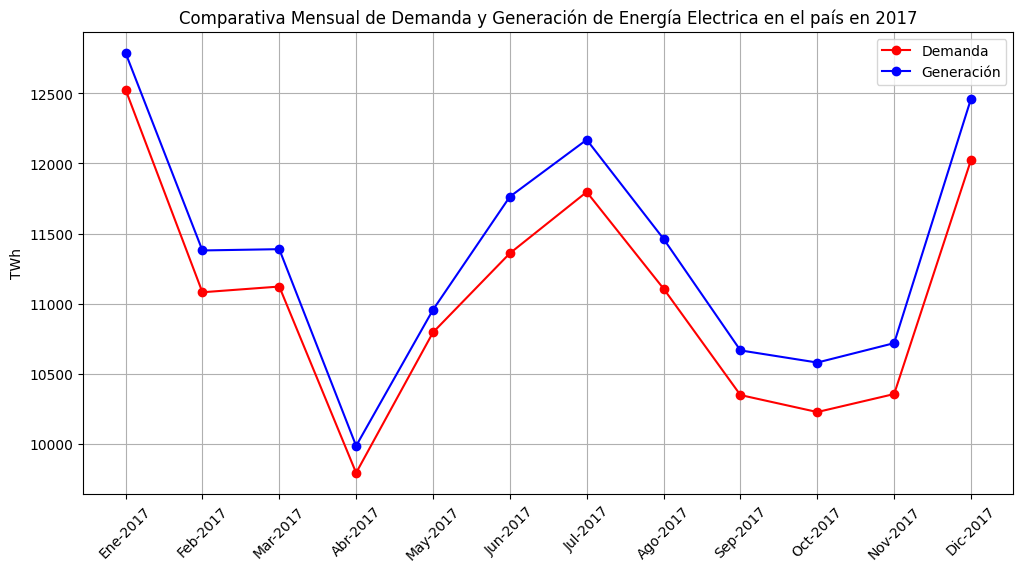

In [ ]:
# Gráfico de serie temporal Año 2017
plt.figure(figsize=(12, 6))
plt.plot(df_combinado_2017['anio'].astype(str) + '-' + df_combinado_2017['mes'].astype(str), df_combinado_2017['demanda_MWh'], label='Demanda', marker='o', color = 'red')
plt.plot(df_combinado_2017['anio'].astype(str) + '-' + df_combinado_2017['mes'].astype(str), df_combinado_2017['generacion_acumulada_MWh'], label='Generación', marker='o', color = 'blue')
#plt.xlabel('')
plt.ylabel('TWh')
meses = ['Ene-2017', 'Feb-2017', 'Mar-2017', 'Abr-2017', 'May-2017', 'Jun-2017', 'Jul-2017', 'Ago-2017', 'Sep-2017', 'Oct-2017', 'Nov-2017', 'Dic-2017']
plt.xticks(range(12), meses, rotation=45)

plt.title('Comparativa Mensual de Demanda y Generación de Energía Electrica en el país en 2017')
plt.legend()
plt.grid(True)
plt.show()


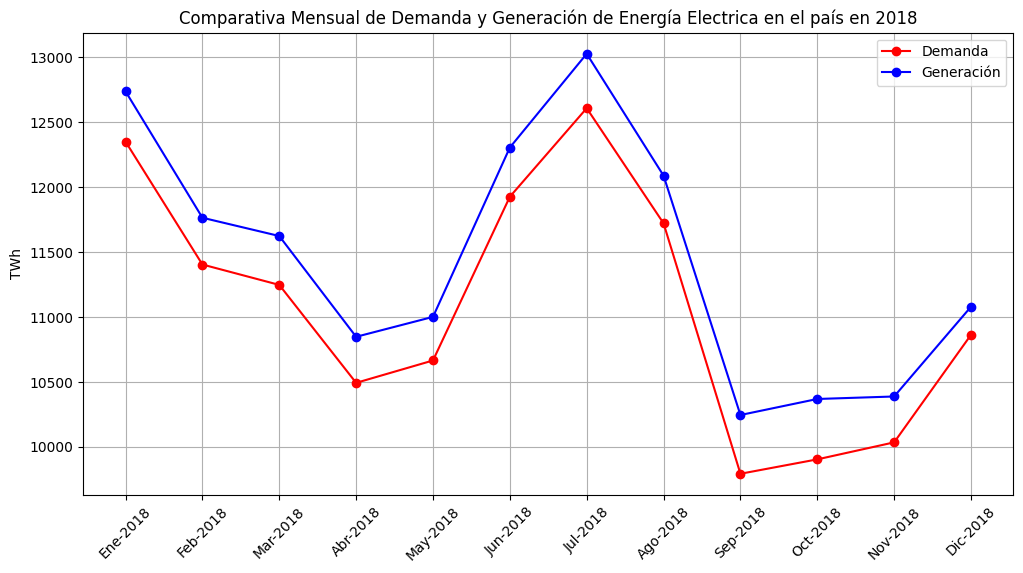

In [ ]:
# Gráfico de serie temporal Año 2018
plt.figure(figsize=(12, 6))
plt.plot(df_combinado_2018['anio'].astype(str) + '-' + df_combinado_2018['mes'].astype(str), df_combinado_2018['demanda_MWh'], label='Demanda', marker='o', color = 'red')
plt.plot(df_combinado_2018['anio'].astype(str) + '-' + df_combinado_2018['mes'].astype(str), df_combinado_2018['generacion_acumulada_MWh'], label='Generación', marker='o', color = 'blue')
#plt.xlabel('')
plt.ylabel('TWh')
meses = ['Ene-2018', 'Feb-2018', 'Mar-2018', 'Abr-2018', 'May-2018', 'Jun-2018', 'Jul-2018', 'Ago-2018', 'Sep-2018', 'Oct-2018', 'Nov-2018', 'Dic-2018']
plt.xticks(range(12), meses, rotation=45)

plt.title('Comparativa Mensual de Demanda y Generación de Energía Electrica en el país en 2018')
plt.legend()
plt.grid(True)
plt.show()

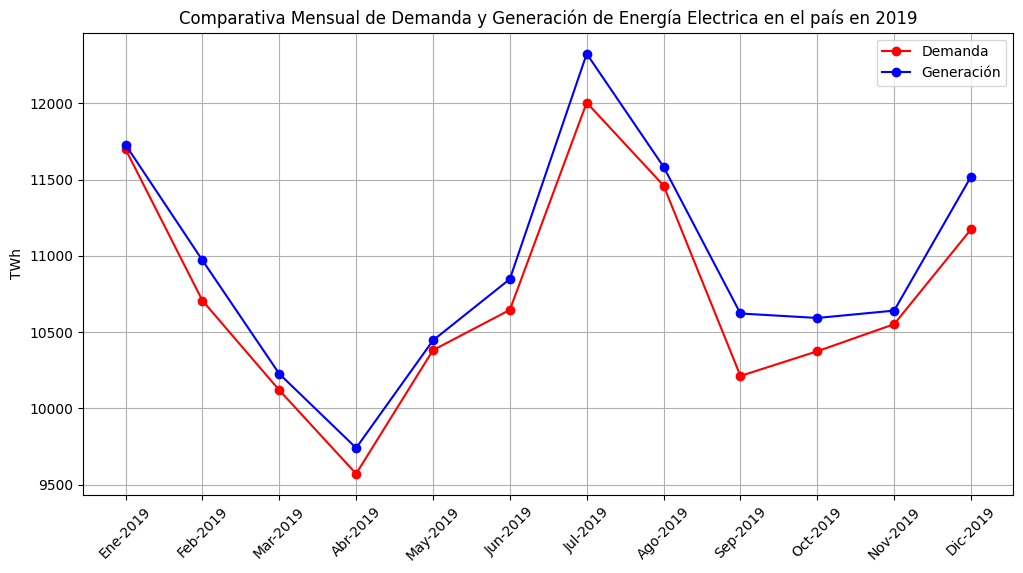

In [ ]:
# Gráfico de serie temporal Año 2019
plt.figure(figsize=(12, 6))
plt.plot(df_combinado_2019['anio'].astype(str) + '-' + df_combinado_2019['mes'].astype(str), df_combinado_2019['demanda_MWh'], label='Demanda', marker='o', color = 'red')
plt.plot(df_combinado_2019['anio'].astype(str) + '-' + df_combinado_2019['mes'].astype(str), df_combinado_2019['generacion_acumulada_MWh'], label='Generación', marker='o', color = 'blue')
#plt.xlabel('')
plt.ylabel('TWh')
meses = ['Ene-2019', 'Feb-2019', 'Mar-2019', 'Abr-2019', 'May-2019', 'Jun-2019', 'Jul-2019', 'Ago-2019', 'Sep-2019', 'Oct-2019', 'Nov-2019', 'Dic-2019']
plt.xticks(range(12), meses, rotation=45)

plt.title('Comparativa Mensual de Demanda y Generación de Energía Electrica en el país en 2019')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Crea un nuevo DataFrame para almacenar la generación acumulada
df_generacion_acumulada = []

# Agrupa df_gene por año, mes y región y suma la generación
generacion_agrupada = df_gen.groupby(['anio', 'mes', 'region'])['generacion_neta_MWh'].sum().reset_index()

# Inicializa la generación acumulada por región
generacion_acumulada = {}
for region in generacion_agrupada['region'].unique():
    generacion_acumulada[region] = 0

# Itera sobre el DataFrame generacion_agrupada para calcular la generación acumulada
for indice, fila in generacion_agrupada.iterrows():
    generacion_acumulada[fila['region']] += fila['generacion_neta_MWh']
    df_generacion_acumulada.append({'anio': fila['anio'],
                                   'mes': fila['mes'],
                                   'region': fila['region'],
                                   'generacion_acumulada_MWh': generacion_acumulada[fila['region']]})

# Convierte la lista en un DataFrame
df_generacion_acumulada = pd.DataFrame(df_generacion_acumulada)

# Ahora df_generacion_acumulada contiene la generación acumulada por región, año y mes

df_generacion_acumulada


,anio,mes,region,generacion_acumulada_MWh
0,2017,1,BUENOS AIRES,2.674556e+06
1,2017,1,CENTRO,5.321255e+05
2,2017,1,COMAHUE,1.405694e+06
3,2017,1,CUYO,8.192234e+05
4,2017,1,GENERAC MOVIL,1.932392e+04
...,...,...,...,...
350,2020,2,GRAN BS.AS.,8.514052e+07
351,2020,2,LITORAL,4.242619e+07
352,2020,2,NORESTE,5.852417e+07
353,2020,2,NOROESTE,3.955144e+07


In [ ]:

# Crea un nuevo DataFrame para almacenar la demanda acumulada
df_demanda_acumulada = []

# Agrupa df_ori por año, mes, región y suma la demanda
demanda_agrupada = df_dem.groupby(['anio', 'mes', 'region'])['demanda_MWh'].sum().reset_index()

# Inicializa la demanda acumulada por región
demanda_acumulada = {}
for region in demanda_agrupada['region'].unique():
    demanda_acumulada[region] = 0

# Itera sobre el DataFrame demanda_agrupada para calcular la demanda acumulada
for indice, fila in demanda_agrupada.iterrows():
    demanda_acumulada[fila['region']] += fila['demanda_MWh']
    df_demanda_acumulada.append({'anio': fila['anio'],
                                'mes': fila['mes'],
                                'region': fila['region'],
                                'demanda_acumulada_MWh': demanda_acumulada[fila['region']]})

# Convierte la lista en un DataFrame
df_demanda_acumulada = pd.DataFrame(df_demanda_acumulada)

# Ahora df_demanda_acumulada contiene la demanda acumulada por región, año y mes
df_demanda_acumulada

,anio,mes,region,demanda_acumulada_MWh
0,2017,1,BUENOS AIRES,1.350718e+06
1,2017,1,CENTRO,1.073331e+06
2,2017,1,COMAHUE,4.873159e+05
3,2017,1,CUYO,8.663854e+05
4,2017,1,GRAN BS.AS.,4.604698e+06
...,...,...,...,...
319,2019,12,GRAN BS.AS.,1.488910e+08
320,2019,12,LITORAL,4.804051e+07
321,2019,12,NORESTE,2.840357e+07
322,2019,12,NOROESTE,3.284681e+07


### Determinación de matriz de correlación y Coeficientes de Pearson, Spearman y Kendall.

In [ ]:
# Calculamos matriz de correlacion de todo el conjunto de datos
matriz_correlacion = data_agrupada_dem[['cantidad', 'energia']].corr()

# Imprime la matriz de correlación
print("Matriz de Correlación:")
print(matriz_correlacion)


Matriz de Correlación:
          cantidad  energia
cantidad   1.00000  0.91407
energia    0.91407  1.00000


In [ ]:
# Calculamos matriz de correlacion de todo el conjunto de datos
matriz_correlacion = data_agrupada_reg[['cantidad', 'energia']].corr()

# Imprime la matriz de correlación
print("Matriz de Correlación:")
print(matriz_correlacion)

Matriz de Correlación:
          cantidad   energia
cantidad  1.000000  0.946251
energia   0.946251  1.000000


In [ ]:
# Calcular los coeficientes de correlación por tipo de tarifa entre las variables identificadas
correlaciones_por_tarifa = {}
for tarifa, grupo in grupo_tarifas:
    if 'energia' in grupo.columns:  # Verificar si la columna 'energia' existe en el grupo
        correlacion = grupo.corr().loc.get('cantidad', {}).get('energia', None)
        if correlacion is not None:
            correlaciones_por_tarifa[tarifa] = correlacion

# Imprimir las correlaciones por tipo de tarifa
print("Coeficientes de Correlación por Tipo de Tarifa:")
for tarifa, correlacion in correlaciones_por_tarifa.items():
    print(f"{tarifa}: {correlacion}")


Coeficientes de Correlación por Tipo de Tarifa:


In [ ]:
# ########################################

In [ ]:
# Paso 1: Filtrar el DataFrame para los grupos de tarifa de interés
grupos_de_interes = ['Industriales', 'Comerciales', 'Residenciales']
data_filtrada = data_agrupada_dem[data_agrupada_dem['tarifa'].isin(grupos_de_interes)]

# Paso 2: Inicializar un diccionario para almacenar las matrices de correlación
matrices_correlacion = {}

# Paso 3: Calcular las matrices de correlación
for grupo in grupos_de_interes:
    # Filtrar los datos del grupo de tarifa actual
    datos_grupo = data_filtrada[data_filtrada['tarifa'] == grupo]
    
    # Calcular la matriz de correlación entre variables explicativas y variable objetivo
    matriz_correlacion = datos_grupo[['cantidad', 'energia']].corrwith(datos_grupo['total'])
    
    # Almacenar la matriz de correlación en el diccionario
    matrices_correlacion[grupo] = matriz_correlacion

# Imprimir las matrices de correlación
for grupo, matriz in matrices_correlacion.items():
    print(f"Matriz de Correlación para {grupo}:")
    print(matriz)


Matriz de Correlación para Industriales:
cantidad   NaN
energia    NaN
dtype: float64
Matriz de Correlación para Comerciales:
cantidad   NaN
energia    NaN
dtype: float64
Matriz de Correlación para Residenciales:
cantidad   NaN
energia    NaN
dtype: float64


In [ ]:
# Resumen de los datos estadísticos de energía renovable por tipo de tecnologia.
# Cinco medidas descriptivas de los datos: el primer cuartil (Q1), la mediana (Q2), el tercer cuartil (Q3),
# el valor máximo, y el valor mínimo
data_agrupada_dem.describe()

,cantidad,energia,total
count,5.000000,5.000000,5.00000
mean,15241.600000,157781.942256,394454.85564
std,15292.207176,145799.580161,0.00000
min,2.000000,0.001979,394454.85564
25%,2700.000000,112418.145232,394454.85564
50%,15347.000000,113623.538603,394454.85564
75%,20055.000000,168413.169826,394454.85564
max,38104.000000,394454.855640,394454.85564


In [ ]:
# Calcular el coeficiente de correlación de Pearson
correlacion_pearson = data_agrupada_dem[['cantidad', 'energia', 'total']].corr(method='pearson')

# Calcular el coeficiente de correlación de Spearman
correlacion_spearman = data_agrupada_dem[['cantidad', 'energia', 'total']].corr(method='spearman')

# Calcular el coeficiente de correlación de Kendall
correlacion_kendall = data_agrupada_dem[['cantidad', 'energia', 'total']].corr(method='kendall')

print("Coeficiente de Correlación de Pearson:")
print(correlacion_pearson)

print("Coeficiente de Correlación de Spearman:")
print(correlacion_spearman)

print("Coeficiente de Correlación de Kendall:")
print(correlacion_kendall)


Coeficiente de Correlación de Pearson:
          cantidad  energia  total
cantidad   1.00000  0.91407    NaN
energia    0.91407  1.00000    NaN
total          NaN      NaN    NaN
Coeficiente de Correlación de Spearman:
          cantidad  energia  total
cantidad       1.0      0.7    NaN
energia        0.7      1.0    NaN
total          NaN      NaN    NaN
Coeficiente de Correlación de Kendall:
          cantidad  energia  total
cantidad       1.0      0.6    NaN
energia        0.6      1.0    NaN
total          NaN      NaN    1.0


In [ ]:
corr_spearman = []

for i, fila in data_agrupada_dem.iterrows():
    tari_calc = data_agrupada_dem[['cantidad', 'energia', 'total']].corr(method='spearman')
    corr_spearman.append(tari_calc)

# Convierte las filas calculadas en un nuevo DataFrame
#df_spearman = pd.DataFrame(corr_spearman)
corr_spearman

[          cantidad  energia  total
 cantidad       1.0      0.7    NaN
 energia        0.7      1.0    NaN
 total          NaN      NaN    NaN,
           cantidad  energia  total
 cantidad       1.0      0.7    NaN
 energia        0.7      1.0    NaN
 total          NaN      NaN    NaN,
           cantidad  energia  total
 cantidad       1.0      0.7    NaN
 energia        0.7      1.0    NaN
 total          NaN      NaN    NaN,
           cantidad  energia  total
 cantidad       1.0      0.7    NaN
 energia        0.7      1.0    NaN
 total          NaN      NaN    NaN,
           cantidad  energia  total
 cantidad       1.0      0.7    NaN
 energia        0.7      1.0    NaN
 total          NaN      NaN    NaN]

In [ ]:
# Agrupar los datos por 'tarifa'
grupos = data_agrupada_dem.groupby('tarifa')

# Inicializar listas para almacenar las correlaciones de Spearman por tarifa
tarifas = []
correlaciones_spearman = []

# Calcular la correlación de Spearman para cada grupo (tarifa)
for tarifa, grupo in grupos:
    correlacion_spearman = stats.spearmanr(grupo['energia'], grupo['total'])
    
    tarifas.append(tarifa)
    correlaciones_spearman.append(correlacion_spearman.correlation)

# Crear un DataFrame con las correlaciones de Spearman
correlaciones_df = pd.DataFrame({'tarifa': tarifas, 'correlacion_spearman': correlaciones_spearman})

print(correlaciones_df)


                        tarifa  correlacion_spearman
0                    Comercial                   NaN
1  Industrial/Comercial Grande                   NaN
2            Mercado a Término                   NaN
3                  Residencial                   NaN
4                        TOTAL                   NaN


In [ ]:
# Agrupar los datos por 'region'
grupos = data_agrupada_reg.groupby('region')

# Inicializar listas para almacenar las correlaciones de Pearson por regiones
regiones = []
correlaciones_pearson = []

# Calcular la correlación de Pearson para cada grupo (region)
for region, grupo in grupos:
    correlacion_pearson = grupo['cantidad'].corr(grupo['total'], method='pearson')
    
    regiones.append(region)
    correlaciones_pearson.append(correlacion_pearson)

# Crear un DataFrame con las correlaciones de Pearson
correlaciones_df = pd.DataFrame({'region': regiones, 'correlacion_pearson': correlaciones_pearson})

print(correlaciones_df)


         region  correlacion_pearson
0  BUENOS AIRES                  NaN
1        CENTRO                  NaN
2       COMAHUE                  NaN
3          CUYO                  NaN
4   GRAN BS.AS.                  NaN
5       LITORAL                  NaN
6       NORESTE                  NaN
7      NOROESTE                  NaN
8    PATAGONICA                  NaN
9         TOTAL                  NaN


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [ ]:
# Agrupar los datos por 'region'
grupos = data_agrupada_reg.groupby('region')

# Inicializar listas para almacenar las correlaciones de Kendall por region
regiones = []
correlaciones_kendall = []

# Calcular la correlación de Kendall para cada grupo (region)
for region, grupo in grupos:
    correlacion_kendall, _ = kendalltau(grupo['cantidad'], grupo['total'])
    
    regiones.append(region)
    correlaciones_kendall.append(correlacion_kendall)

# Crear un DataFrame con las correlaciones de Kendall
correlaciones_df = pd.DataFrame({'region': regiones, 'correlacion_kendall': correlaciones_kendall})

print(correlaciones_df)


         region  correlacion_kendall
0  BUENOS AIRES                  NaN
1        CENTRO                  NaN
2       COMAHUE                  NaN
3          CUYO                  NaN
4   GRAN BS.AS.                  NaN
5       LITORAL                  NaN
6       NORESTE                  NaN
7      NOROESTE                  NaN
8    PATAGONICA                  NaN
9         TOTAL                  NaN


### Separa datos de prueba y entrenamiento para el modelo para predecir demanda con generacion.

In [ ]:
#cond = (df_dem['region']=='LITORAL') & (df_dem['anio']==2017) & (df_dem['mes']==8)
#filas_sel = df_dem[cond]['demanda_MWh'].sum() / 1000
#cond = (df_combinado['region']=='LITORAL') & (df_dem['anio']==2017) & (df_dem['mes']==8)
#filas_sel = df_combinado[cond]

In [ ]:
#pd.set_option('display.max_rows', None)
#print(filas_sel)

# Restablece la opción de visualización a su valor predeterminado
#pd.reset_option('display.max_rows')

In [ ]:
# Diccionario para almacenar los datos agrupados
data = {
    'anio': [],
    'mes': [],
    'region': [],
    'cantidad': [],
    'energia': [],
    'total': []
}

total_general = 0

# Agrupar el DataFrame por 'anio', 'mes', 'region' y calcular la suma de 'demanda_MWh' para cada grupo
grupo_dem_regiones = df_dem.groupby(['anio', 'mes', 'region'])

for (anio, mes, region), grupo in grupo_dem_regiones:
    cantidad_registros = len(grupo)
    demanda_energia = (grupo['demanda_MWh'].sum()) / 1000

    # Agregar los valores al diccionario
    data['anio'].append(anio)
    data['mes'].append(mes)
    data['region'].append(region)
    data['cantidad'].append(cantidad_registros)
    data['energia'].append(demanda_energia)
    data['total'].append(total_general)  # Actualizar el 'total' general
    total_general += demanda_energia

# Crear el DataFrame
df_demanda_reg = pd.DataFrame(data)

In [ ]:
#pd.set_option('display.max_rows', None)
#print(df_demanda_reg)

# Restablece la opción de visualización a su valor predeterminado
#pd.reset_option('display.max_rows')

In [ ]:
# Diccionario para almacenar los datos agrupados
data = {
    'anio': [],
    'mes': [],
    'region': [],
    'cantidad': [],
    'energia': [],
    'total': []
}

total_general = 0

# Agrupar el DataFrame por 'anio', 'mes', 'region' y calcular la suma de 'demanda_MWh' para cada grupo
grupo_gen_regiones = df_gen.groupby(['anio', 'mes', 'region'])

for (anio, mes, region), grupo in grupo_gen_regiones:
    cantidad_registros = len(grupo)
    generacion_energia = (grupo['generacion_neta_MWh'].sum()) / 1000

    # Agregar los valores al diccionario
    data['anio'].append(anio)
    data['mes'].append(mes)
    data['region'].append(region)
    data['cantidad'].append(cantidad_registros)
    data['energia'].append(generacion_energia)
    data['total'].append(generacion_energia)     #(total_general)  # Actualizar el 'total' general
    total_general += generacion_energia

# Crear el DataFrame
df_generacion_reg = pd.DataFrame(data)

In [ ]:
#cond = df_demanda_reg['anio']==2017
#df_dem_2017 = df_demanda_reg[cond]
df_demanda_reg

,anio,mes,region,cantidad,energia,total
0,2017,1,BUENOS AIRES,360,1350.718137,0.000000
1,2017,1,CENTRO,40,1073.331276,1350.718137
2,2017,1,COMAHUE,66,487.315910,2424.049413
3,2017,1,CUYO,73,866.385414,2911.365323
4,2017,1,GRAN BS.AS.,222,4604.697785,3777.750737
...,...,...,...,...,...,...
319,2019,12,GRAN BS.AS.,195,4041.133270,386658.134143
320,2019,12,LITORAL,69,1340.763312,390699.267413
321,2019,12,NORESTE,30,947.276715,392040.030725
322,2019,12,NOROESTE,58,987.407442,392987.307440


In [ ]:
df_generacion_reg

,anio,mes,region,cantidad,energia,total
0,2017,1,BUENOS AIRES,69,2674.555976,0.000000
1,2017,1,CENTRO,52,532.125521,2674.555976
2,2017,1,COMAHUE,44,1405.694144,3206.681497
3,2017,1,CUYO,39,819.223432,4612.375641
4,2017,1,GRAN BS.AS.,47,2743.230637,5431.599073
...,...,...,...,...,...,...
319,2019,12,GRAN BS.AS.,75,2338.689329,398905.346885
320,2019,12,LITORAL,44,986.068371,401244.036214
321,2019,12,NORESTE,30,1222.360413,402230.104585
322,2019,12,NOROESTE,84,889.891925,403452.464998


In [ ]:
#cond = df_generacion_reg['anio']==2017
#df_gen_2017 = df_generacion_reg[cond]
#df_gen_2017.info()

In [ ]:
# Combina los DataFrames en uno SOLO
df_combinado = df_demanda_reg.merge(df_generacion_reg, on=['anio', 'mes','region'])
df_combinado

,anio,mes,region,cantidad_x,energia_x,total_x,cantidad_y,energia_y,total_y
0,2017,1,BUENOS AIRES,360,1350.718137,0.000000,69,2674.555976,2674.555976
1,2017,1,CENTRO,40,1073.331276,1350.718137,52,532.125521,532.125521
2,2017,1,COMAHUE,66,487.315910,2424.049413,44,1405.694144,1405.694144
3,2017,1,CUYO,73,866.385414,2911.365323,39,819.223432,819.223432
4,2017,1,GRAN BS.AS.,222,4604.697785,3777.750737,47,2743.230637,2743.230637
...,...,...,...,...,...,...,...,...,...
319,2019,12,GRAN BS.AS.,195,4041.133270,386658.134143,75,2338.689329,2338.689329
320,2019,12,LITORAL,69,1340.763312,390699.267413,44,986.068371,986.068371
321,2019,12,NORESTE,30,947.276715,392040.030725,30,1222.360413,1222.360413
322,2019,12,NOROESTE,58,987.407442,392987.307440,84,889.891925,889.891925


In [ ]:
# Combina los DataFrames en uno SOLO
df_combinado = df_demanda_reg.merge(df_generacion_reg, on=['anio', 'mes','region'])
df_combinado

,anio,mes,region,cantidad_x,energia_x,total_x,cantidad_y,energia_y,total_y
0,2017,1,BUENOS AIRES,360,1350.718137,0.000000,69,2674.555976,2674.555976
1,2017,1,CENTRO,40,1073.331276,1350.718137,52,532.125521,532.125521
2,2017,1,COMAHUE,66,487.315910,2424.049413,44,1405.694144,1405.694144
3,2017,1,CUYO,73,866.385414,2911.365323,39,819.223432,819.223432
4,2017,1,GRAN BS.AS.,222,4604.697785,3777.750737,47,2743.230637,2743.230637
...,...,...,...,...,...,...,...,...,...
319,2019,12,GRAN BS.AS.,195,4041.133270,386658.134143,75,2338.689329,2338.689329
320,2019,12,LITORAL,69,1340.763312,390699.267413,44,986.068371,986.068371
321,2019,12,NORESTE,30,947.276715,392040.030725,30,1222.360413,1222.360413
322,2019,12,NOROESTE,58,987.407442,392987.307440,84,889.891925,889.891925


In [ ]:
# Agrupa el DataFrame original por 'anio' y 'mes' y calcula la suma de 'energia_x' y 'energia_y'
suma_energia_x = df_combinado.groupby(['anio', 'mes'])['energia_x'].transform('sum')
suma_energia_y = df_combinado.groupby(['anio', 'mes'])['energia_y'].transform('sum')

# Asigna los totales calculados a las columnas 'total_x' y 'total_y'
df_combinado['total_x'] = suma_energia_x
df_combinado['total_y'] = suma_energia_y
df_combinado

,anio,mes,region,cantidad_x,energia_x,total_x,cantidad_y,energia_y,total_y
0,2017,1,BUENOS AIRES,360,1350.718137,12526.622750,69,2674.555976,12788.577644
1,2017,1,CENTRO,40,1073.331276,12526.622750,52,532.125521,12788.577644
2,2017,1,COMAHUE,66,487.315910,12526.622750,44,1405.694144,12788.577644
3,2017,1,CUYO,73,866.385414,12526.622750,39,819.223432,12788.577644
4,2017,1,GRAN BS.AS.,222,4604.697785,12526.622750,47,2743.230637,12788.577644
...,...,...,...,...,...,...,...,...,...
319,2019,12,GRAN BS.AS.,195,4041.133270,11173.802628,75,2338.689329,11519.339291
320,2019,12,LITORAL,69,1340.763312,11173.802628,44,986.068371,11519.339291
321,2019,12,NORESTE,30,947.276715,11173.802628,30,1222.360413,11519.339291
322,2019,12,NOROESTE,58,987.407442,11173.802628,84,889.891925,11519.339291


In [ ]:
### Separa datos de prueba y entrenamiento para el modelo.
# DataFrame llamado 'data' con las características (X) y las etiquetas (y)
X = df_combinado[['cantidad_x', 'energia_x','total_x']]
y = df_combinado[['cantidad_y', 'energia_y','total_y']]

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train y y_train son los datos de entrenamiento
# X_test y y_test son los datos de prueba


In [ ]:
X_train

,cantidad_x,energia_x,total_x
73,46,896.818116,10348.584573
181,46,837.082325,9793.358119
17,92,367.680706,11081.460853
24,55,909.602428,11122.231576
146,76,429.263315,10665.461535
...,...,...,...
188,85,472.883912,9793.358119
71,89,493.297887,11107.250721
106,94,1130.378065,12024.595486
270,217,1356.987245,12004.210209


### Modelo de Regresión Lineal.

In [ ]:
# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo en los datos de entrenamiento
modelo.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = modelo.predict(X_test)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)

# Imprimir el valor de R^2
print("Coeficiente de determinación (R^2):", r2)


Coeficiente de determinación (R^2): 0.6102454630044879


### Separa datos de prueba y entrenamiento para el modelo para predecir demanda con generacion.

In [ ]:
# Calculamos matriz de correlacion de todo el conjunto de datos
matriz_correlacion = df_combinado[['cantidad_x', 'energia_x', 'total_x','cantidad_y', 'energia_y','total_y']].corr()

# Imprime la matriz de correlación
print("Matriz de Correlación:")
print(matriz_correlacion)

Matriz de Correlación:
            cantidad_x  energia_x   total_x  cantidad_y  energia_y   total_y
cantidad_x    1.000000   0.451954  0.038458    0.618583   0.627246  0.051318
energia_x     0.451954   1.000000  0.082466    0.305205   0.553469  0.081711
total_x       0.038458   0.082466  1.000000   -0.054050   0.133213  0.990847
cantidad_y    0.618583   0.305205 -0.054050    1.000000   0.358354 -0.060545
energia_y     0.627246   0.553469  0.133213    0.358354   1.000000  0.134444
total_y       0.051318   0.081711  0.990847   -0.060545   0.134444  1.000000


In [ ]:
# Calcular el coeficiente de correlación de Pearson
correlacion_pearson = df_combinado[['cantidad_x', 'energia_x', 'total_x','cantidad_y', 'energia_y', 'total_y']].corr(method='pearson')

# Calcular el coeficiente de correlación de Spearman
correlacion_spearman = df_combinado[['cantidad_x', 'energia_x', 'total_x','cantidad_y', 'energia_y', 'total_y']].corr(method='spearman')

# Calcular el coeficiente de correlación de Kendall
correlacion_kendall = df_combinado[['cantidad_x', 'energia_x', 'total_x','cantidad_y', 'energia_y', 'total_y']].corr(method='kendall')

print("Coeficiente de Correlación de Pearson:")
print(correlacion_pearson)

print("Coeficiente de Correlación de Spearman:")
print(correlacion_spearman)

print("Coeficiente de Correlación de Kendall:")
print(correlacion_kendall)


Coeficiente de Correlación de Pearson:
            cantidad_x  energia_x   total_x  cantidad_y  energia_y   total_y
cantidad_x    1.000000   0.451954  0.038458    0.618583   0.627246  0.051318
energia_x     0.451954   1.000000  0.082466    0.305205   0.553469  0.081711
total_x       0.038458   0.082466  1.000000   -0.054050   0.133213  0.990847
cantidad_y    0.618583   0.305205 -0.054050    1.000000   0.358354 -0.060545
energia_y     0.627246   0.553469  0.133213    0.358354   1.000000  0.134444
total_y       0.051318   0.081711  0.990847   -0.060545   0.134444  1.000000
Coeficiente de Correlación de Spearman:
            cantidad_x  energia_x   total_x  cantidad_y  energia_y   total_y
cantidad_x    1.000000   0.527685  0.049974    0.362048   0.446192  0.079445
energia_x     0.527685   1.000000  0.148784    0.408104   0.424530  0.146735
total_x       0.049974   0.148784  1.000000   -0.059304   0.110653  0.985328
cantidad_y    0.362048   0.408104 -0.059304    1.000000   0.321209 -0.0714